<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/DS_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Dataset**

In [ ]:
datasetRegLin = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Notas.csv")

display(datasetRegLin.head())

,Horas de Estudo,Exercícios Feitos,Frequência nas Aulas,Nota Final
0,7.49,31,41.00,67.94
1,19.01,38,70.73,100.00
2,14.64,48,53.59,100.00
3,11.97,31,78.71,97.78
4,3.12,3,50.46,35.95


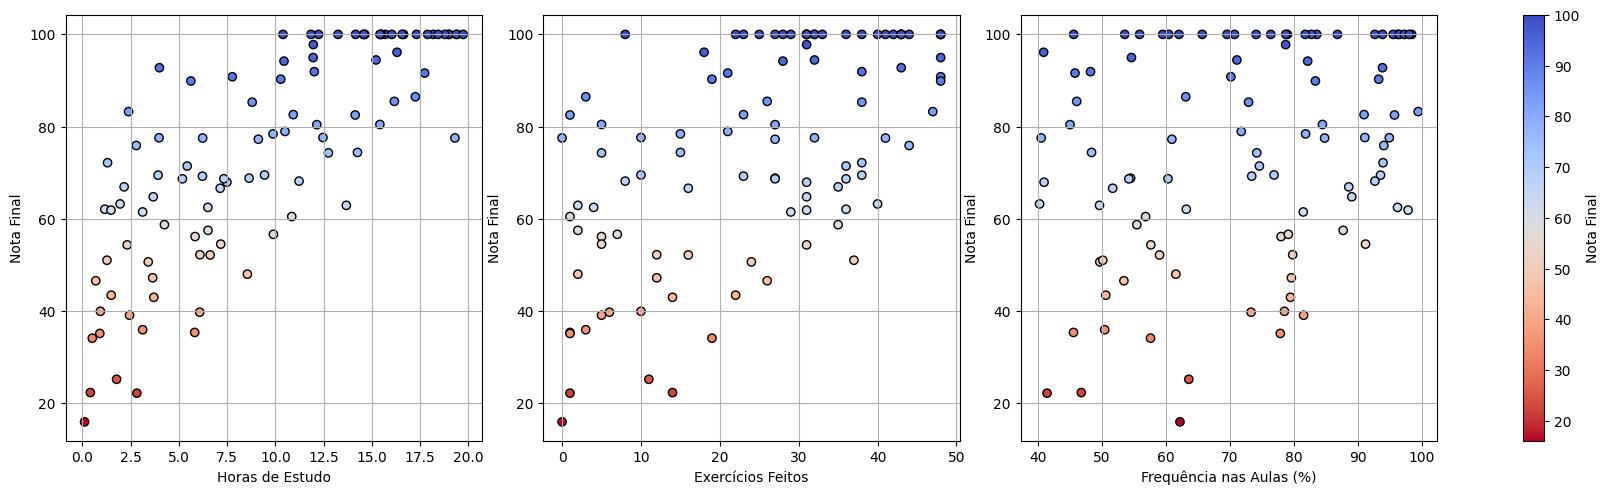

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#HORAS DE ESTUDO
axs[0].scatter(datasetRegLin['Horas de Estudo'], datasetRegLin['Nota Final'], c=datasetRegLin['Nota Final'], cmap='coolwarm_r', edgecolor='k')
axs[0].set_xlabel('Horas de Estudo')
axs[0].set_ylabel('Nota Final')
axs[0].grid(True)

#EXERCÍCIOS FEITOS
axs[1].scatter(datasetRegLin['Exercícios Feitos'], datasetRegLin['Nota Final'], c=datasetRegLin['Nota Final'], cmap='coolwarm_r', edgecolor='k')
axs[1].set_xlabel('Exercícios Feitos')
axs[1].set_ylabel('Nota Final')
axs[1].grid(True)

#FREQUÊNCIA NAS AULAS
axs[2].scatter(datasetRegLin['Frequência nas Aulas'], datasetRegLin['Nota Final'], c=datasetRegLin['Nota Final'], cmap='coolwarm_r', edgecolor='k')
axs[2].set_xlabel('Frequência nas Aulas (%)')
axs[2].set_ylabel('Nota Final')
axs[2].grid(True)

plt.tight_layout()
plt.colorbar(axs[2].collections[0], ax=axs, orientation='vertical', label='Nota Final')
plt.show()

## **Modelo**

In [ ]:
#DEFINIR VARIÁVEIS
XRegLin = datasetRegLin.drop(["Nota Final"], axis=1)
YRegLin = datasetRegLin["Nota Final"]

#DIVISÃO EM TREINO E TESTE
XRegLin_treino, XRegLin_teste, YRegLin_treino, YRegLin_teste = train_test_split(XRegLin, YRegLin, test_size=0.2, random_state=42)

#TREINO DO MODELO
modeloRegLin = LinearRegression()
modeloRegLin.fit(XRegLin_treino, YRegLin_treino)

LinearRegression()


📊 Influência de cada variável na Nota Final:
               Variável  Coeficiente
2  Frequência nas Aulas     0.238556
1     Exercícios Feitos     0.747565
0       Horas de Estudo     2.711406


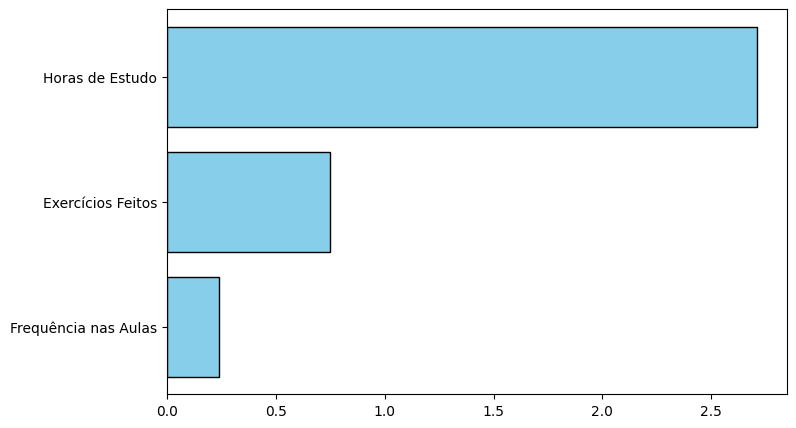

In [ ]:
coeficientes = modeloRegLin.coef_
variaveis = XRegLin.columns

impacto = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente')

print("\n📊 Influência de cada variável na Nota Final:")
print(impacto)

plt.figure(figsize=(8, 5))
plt.barh(impacto['Variável'], impacto['Coeficiente'], color='skyblue', edgecolor='black')
plt.show()

In [ ]:
YRegLin_Pred = modeloRegLin.predict(XRegLin_teste)

#MÉTRICAS DE AVALIAÇÃO
mae = mean_absolute_error(YRegLin_teste, YRegLin_Pred)
mse = mean_squared_error(YRegLin_teste, YRegLin_Pred)
rmse = np.sqrt(mse)
r2 = r2_score(YRegLin_teste, YRegLin_Pred)

print("\n📊 Avaliação do Modelo de Regressão Linear")
print("-" * 50)
print(f"✔️  MAE  (Erro Absoluto Médio): {mae:.2f}")
print(f"✔️  RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"✔️  R²   (Coeficiente de Determinação): {r2:.2%}")
print("-" * 50)


📊 Avaliação do Modelo de Regressão Linear
--------------------------------------------------
✔️  MAE  (Erro Absoluto Médio): 4.85
✔️  RMSE (Raiz do Erro Quadrático Médio): 6.59
✔️  R²   (Coeficiente de Determinação): 91.83%
--------------------------------------------------
